In [1]:
from ema_workbench import load_results
results = load_results(r'C:/Users/karan/OneDrive/Desktop/EMA_runs/1000runs.tar.gz')

In [2]:
experiments, outcomes = results

[MainProcess/INFO] results loaded successfully from C:\Users\karan\OneDrive\Desktop\EMA_runs\1000runs.tar.gz
C:\Users\karan\AppData\Local\Temp\ipykernel_17124\4117800038.py:32: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  all_scores = all_scores.loc[top_5, :]


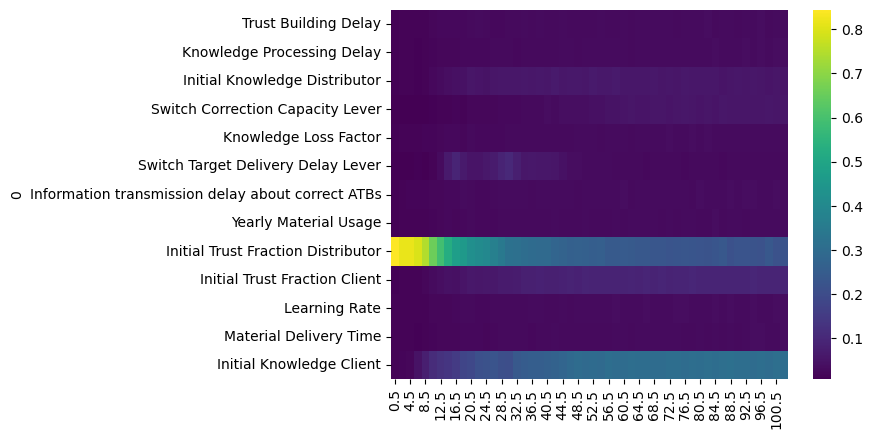

In [4]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from ema_workbench.analysis import feature_scoring
from ema_workbench import ema_logging
from ema_workbench.analysis.feature_scoring import get_ex_feature_scores, RuleInductionType

ema_logging.log_to_stderr(level=ema_logging.INFO)

# load data
fn = (r'C:/Users/karan/OneDrive/Desktop/EMA_runs/1000runs.tar.gz')

x, outcomes = load_results(fn)
x = x.drop(["model", "policy"], axis=1)

y = outcomes["Trust Distributor in Client"]

all_scores = []

# we only want to show those uncertainties that are in the top 5
# most sensitive parameters at any time step
top_5 = set()
for i in range(2, y.shape[1], 8):
    data = y[:, i]
    scores = get_ex_feature_scores(x, data, mode=RuleInductionType.REGRESSION)[0]
    # add the top five for this time step to the set of top5s
    top_5 |= set(scores.nlargest(5, 1).index.values)
    scores = scores.rename(columns={1: outcomes["TIME"][0, i]})
    all_scores.append(scores)

all_scores = pd.concat(all_scores, axis=1, sort=False)
all_scores = all_scores.loc[top_5, :]

fig, ax = plt.subplots()
sns.heatmap(all_scores, ax=ax, cmap="viridis")
plt.show()

[MainProcess/INFO] results loaded successfully from C:\Users\karan\OneDrive\Desktop\EMA_runs\1000runs.tar.gz
C:\Users\karan\AppData\Local\Temp\ipykernel_17124\339391108.py:25: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  all_scores = all_scores.loc[top_5, :]


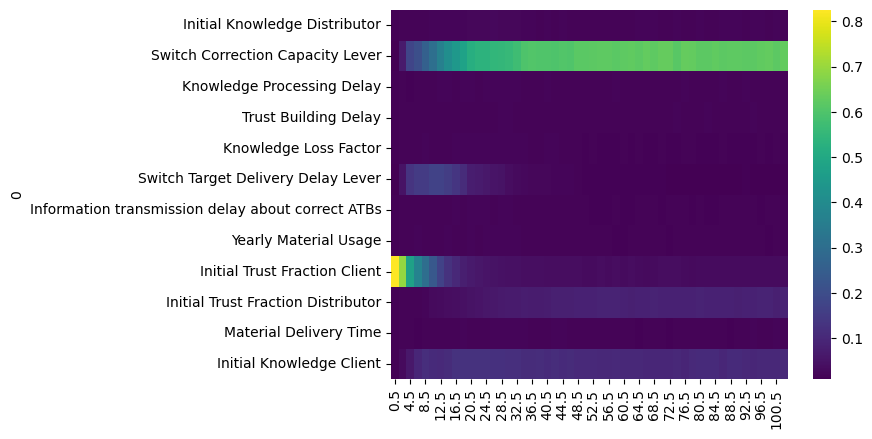

In [5]:
ema_logging.log_to_stderr(level=ema_logging.INFO)

# load data
fn = (r'C:/Users/karan/OneDrive/Desktop/EMA_runs/1000runs.tar.gz')

x, outcomes = load_results(fn)
x = x.drop(["model", "policy"], axis=1)

y = outcomes["Trust Client in Distributor"]

all_scores = []

# we only want to show those uncertainties that are in the top 5
# most sensitive parameters at any time step
top_5 = set()
for i in range(2, y.shape[1], 8):
    data = y[:, i]
    scores = get_ex_feature_scores(x, data, mode=RuleInductionType.REGRESSION)[0]
    # add the top five for this time step to the set of top5s
    top_5 |= set(scores.nlargest(5, 1).index.values)
    scores = scores.rename(columns={1: outcomes["TIME"][0, i]})
    all_scores.append(scores)

all_scores = pd.concat(all_scores, axis=1, sort=False)
all_scores = all_scores.loc[top_5, :]

fig, ax = plt.subplots()
sns.heatmap(all_scores, ax=ax, cmap="viridis")
plt.show()